# Loading the MNIST dataset in Keras

x_train and y_train form the training set, the data that the model will learn from.

The model will then be tested on the test set, x_test and y_test.

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train), ( x_test,y_test) = mnist.load_data()

### Training Data

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train.shape  

(60000,)

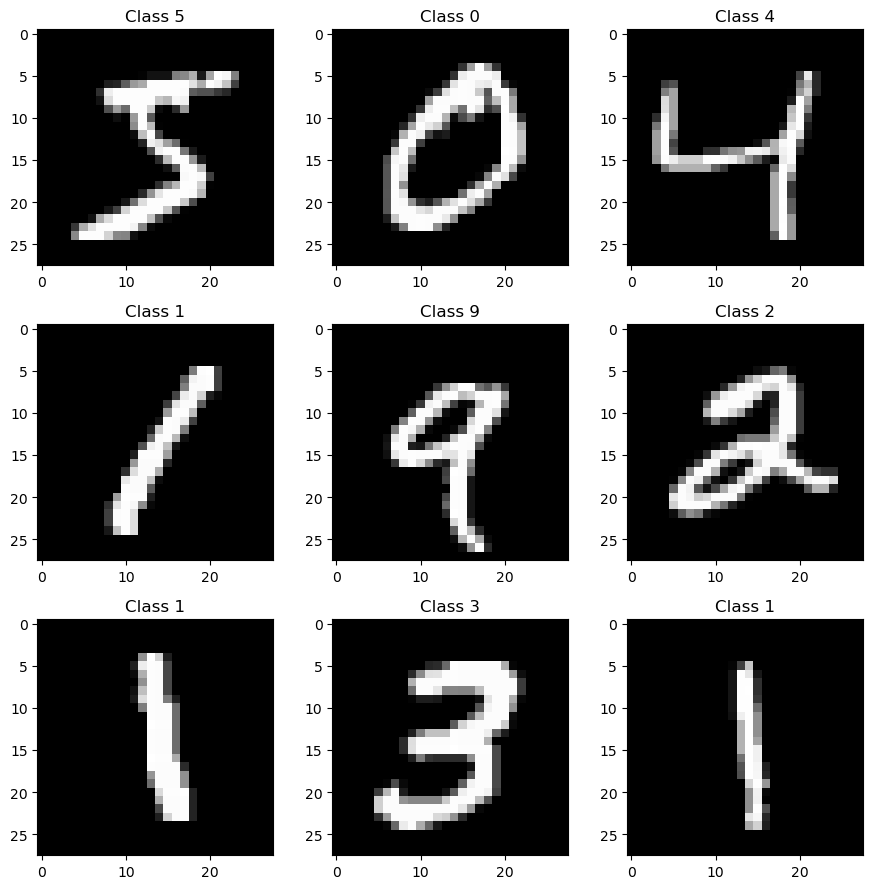

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    
plt.tight_layout()

In [7]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Test Data

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
y_test[0]

7

### Network Architecture (1)

In [11]:
from keras.models import Sequential 
from keras.layers import Dense

In [12]:
def model():
    nn=Sequential(name="ANN")
    nn.add(Dense(50, input_shape=(28*28,),name="Input"))
    nn.add(Dense(10,name='Output', activation='softmax')) 
    nn.compile(optimizer="rmsprop",loss="CategoricalCrossentropy")
    
    
    return nn

### The compile step (1) 

In [13]:
nn=model()
nn.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 50)                39250     
                                                                 
 Output (Dense)              (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


### OR

### Network Architecture (2)

In [14]:
from keras import models
from keras import layers
import tensorflow as tf

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# network.add(layers.Dense(10, activation='softmax'))

### The compile step (2) 

In [15]:
network.compile(optimizer='rmsprop',
loss=tf.keras.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

In [16]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Preparing the image data

In [17]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [18]:
x_train.shape

(60000, 784)

### Preparing the labels

In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Fit Model for nn

In [21]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [22]:
nn.fit(x_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.4279
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2948
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2807
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2730
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2682
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2644
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2617
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2598
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2579
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2562


### Evaluate the mode (nn)

In [23]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 10)


In [24]:
test_loss1, test_acc1 = nn.evaluate(x_test,y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2722


TypeError: cannot unpack non-iterable float object

### Fit model for network

In [25]:
network.fit(x_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2634 - accuracy: 0.9254
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1079 - accuracy: 0.9679
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0721 - accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0518 - accuracy: 0.9840
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0388 - accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0301 - accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0176 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0132 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0099 - accura

### Evaluate the model(network)

In [26]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 10)


In [27]:
test_loss, test_acc = network.evaluate(x_test,y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0629 - accuracy: 0.9816
test_acc: 0.9815999865531921
